## <center> Go to piazza and open today's lecture notes in the hub! </center>
## <center> https://piazza.com/class/jzioyk40mhs6r2 </center>
## <center> Let's go to tophat for attendance! </center>
## <center> https://app.tophat.com/e/245218 </center>

## <center> Project: midterm presentations </center>

During the TA office hours on October 21, 22, 25. There will be no homework due on that week.

10 min slot for everyone (6 min  presentation + 2-3 min questions).

The presnetation should describe the task you are trying to solve, the dataset, the preprocessing, and interesting findings that came out of EDA.

## <center> Mud card </center>
- **Is mcar test only applicable to all numeric values (after preprocessing procedure)?**
   - Yes. More generally, the dataframe that you pass to the function needs to contain all numeric values and nans (int, float, np.nan).
- **How are the rows or columns of the correlation matrix ordered?**
   - the rows and columns are features in the input dataframe and the features are ordered the same was as in the dataframe.
   - let's check this more closely!


In [1]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Let's load the data
df = pd.read_csv('data/train.csv')
# drop the ID
df.drop(columns=['Id'],inplace=True)
print(df.shape)

# collect the various features
cat_ftrs = ['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood','Condition1','Condition2',\
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',\
           'Heating','CentralAir','Electrical','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']
ordinal_ftrs = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',\
               'BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',\
               'GarageQual','GarageCond','PoolQC','Fence']
ordinal_cats = [['Reg','IR1','IR2','IR3'],['AllPub','NoSewr','NoSeWa','ELO'],['Gtl','Mod','Sev'],\
               ['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Po','Fa','TA','Gd','Ex'],['NA','No','Mn','Av','Gd'],['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],\
               ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],['Po','Fa','TA','Gd','Ex'],['Po','Fa','TA','Gd','Ex'],\
               ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],['NA','Po','Fa','TA','Gd','Ex'],\
               ['NA','Unf','RFn','Fin'],['NA','Po','Fa','TA','Gd','Ex'],['NA','Po','Fa','TA','Gd','Ex'],
               ['NA','Fa','TA','Gd','Ex'],['NA','MnWw','GdWo','MnPrv','GdPrv']]
num_ftrs = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',\
             'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',\
             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',\
             'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',\
             'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

(1460, 80)


In [2]:
# preprocess with pipeline and columntransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

# fit_transform the data
X_prep = preprocessor.fit_transform(df)
# little hacky, but collect feature names
feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][1].get_feature_names()) + \
                preprocessor.transformers_[2][-1]

df_preprocessed = pd.DataFrame(data=X_prep,columns=feature_names)
df_preprocessed['SalePrice'] = df['SalePrice']

print(df_preprocessed.shape)


(1460, 230)


In [3]:
corr_matrix = df_preprocessed.corr()
print(df_preprocessed.columns)
print(corr_matrix.shape)
print(corr_matrix)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'SalePrice'],
      dtype='object', length=230)
(230, 230)
               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       

## <center> Mud card </center>
- **Why are some of the correlation graphs all red and some red and blue?**
   - some red and blue: the rows/columns in the correlation matrix are in the same order as the columns of the dataframe.
   - all red: the correlation matrix is sorted 

<center><img src="figures/corr_coeff_all.png" width="600"></center>

<center><img src="figures/corr_coeff_dummies.png" width="600"></center>

## <center> Mud card </center>
- **Pd.plotting.scatter_matrix**
   - let's check the help!

In [4]:
help(pd.plotting.scatter_matrix)

Help on function scatter_matrix in module pandas.plotting._misc:

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot

# Exploratory data analysis, part 2, EDA in classification
### By the end of this lecture, you will be able to
- Study the label and categorical features
- Plot class-specific distributions of numerical features
- Plot class-specific frequencies of categorical features



## <center> High-level overview </center>


| *Visualization types*        	|    label continuous    	| label categorical 	|     feature continuous     	|     feature categorical/ordinal    	|
|---------------------	|:----------------------:	|:-----------------:	|:--------------------------:	|:--------------------------:	|
| __label continuous__    	| histogram, .describe() 	|         ---         	|    scatter plot/heatmap    	|           boxplot, histogram          	|
| __label categorical__   	|            ---           	|  dataset balance, bar plot  	|           boxplot, histogram          	|        plt.matshow()       	|
| __feature continuous__  	|  scatter plot/heatmap  	|      boxplot, histogram      	| scatter/correlation matrix 	| scatter/correlation matrix 	|
| __feature categorical/ordinal__ 	|         boxplot, histogram        	|   plt.matshow()   	| scatter/correlation matrix 	| scatter/correlation matrix 	|

## Dataset of the day

Adult dataset

## Packages of the day

matplotlib and pandas

### <font color='LIGHTGRAY'>By the end of this lecture, youy will be able to</font>
- **Study the label and categorical features**
- <font color='LIGHTGRAY'>Plot class-specific distributions of numerical features</font>
- <font color='LIGHTGRAY'>Plot class-specific frequencies of categorical features</font>



##  Let's preprocess the data first!

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pylab as plt

df = pd.read_csv('data/adult_data.csv')

cat_ftrs = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
cont_ftrs = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
label = 'gross-income'

In [6]:
# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)
    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

# label encoder
label_transformer = Pipeline(steps=[
    ('label_enc', ModifiedLabelEncoder())])

In [7]:
# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, cont_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('label',label_transformer, label)])

# fit_transform the data
X_prep = preprocessor.fit_transform(df)

# little hacky, but collect feature names
feature_names = preprocessor.transformers_[0][-1] + \
                list(preprocessor.named_transformers_['cat'][0].get_feature_names()) + \
                [label]

df_preprocessed = pd.DataFrame(data=X_prep,columns=feature_names)
df_preprocessed.to_csv('data/adult_prep.csv',index=False)

print(df_preprocessed.shape)
print(df_preprocessed.head())

(32561, 109)
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours-per-week  x0_ ?  x0_ Federal-gov  x0_ Local-gov  x0_ Never-worked  \
0       -0.035429    0.0              0.0            0.0               0.0   
1       -2.222153    0.0              0.0            0.0               0.0   
2       -0.035429    0.0              0.0            0.0               0.0   
3       -0.035429    0.0              0.0            0.0               0.0   
4       -0.035429    0.0              0.0            0.0               0.0   

   ...  x7_ Puerto-Rico  x7_ Scotland  x7_ South  x7_ Taiwan  x7_ Thailand  \
0  ...              0.0        

### The balance of the dataset

In [8]:
# I switch back and forth between df and df_preprocessed
print(df_preprocessed[label].value_counts()/df_preprocessed[label].shape)
print(df[label].value_counts()/df[label].shape)

0.0    0.75919
1.0    0.24081
Name: gross-income, dtype: float64
 <=50K    0.75919
 >50K     0.24081
Name: gross-income, dtype: float64


### Why is this important?

- balance: the fraction of data points that belong to the most populous class
- the balance of the classification problem is the first thing you should check!
- it gives a baseline accuracy score
    - the simplest classifier that predicts class 0 to all points is correct 75.9% of the time
    - a classification model has predictive power if it is  more accurate than the baseline
- it can guide what evaluation metric should be used
    - imbalanced problems: most points belong to class 0
       - accuracy is not a good metric because the baseline is high


### Feature is categorical

In [9]:
print(df['occupation'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


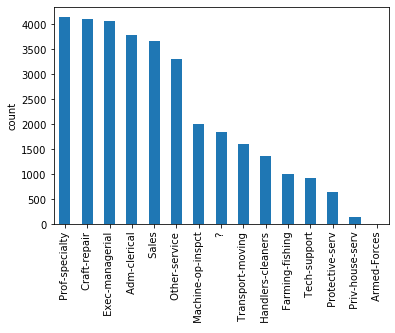

In [10]:
pd.value_counts(df['occupation']).plot.bar()
plt.ylabel('count')
plt.show()

## Exercise 1

Let's assume we want to predict the education level of people based on the other features we have in the adult dataset. What's the balance of this problem? Give your answer with two digits after the decimal point.

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Study the label and categorical features</font>
- **Plot class-specific distributions of numerical features**
- <font color='LIGHTGRAY'>Plot class-specific frequencies of categorical features</font>



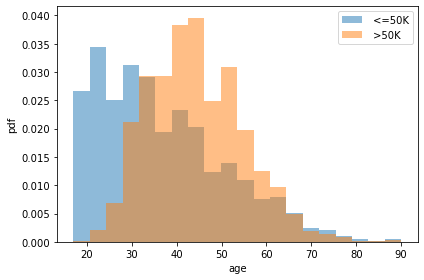

In [12]:
import matplotlib
from matplotlib import pylab as plt

categories = df[label].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df[label]==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('pdf')
plt.xlabel('age')
plt.tight_layout()
plt.savefig('figures/histo.png',dpi=300)
plt.show()

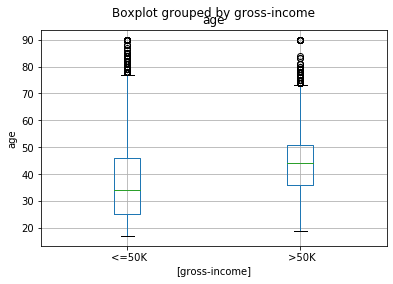

In [13]:
# boxplot

df[['age',label]].boxplot(by=label)
plt.ylabel('age')
plt.savefig('figures/boxplot.png',dpi=300)
plt.show()

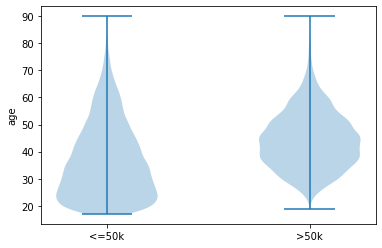

In [14]:
# violin plot
dataset = [df[df_preprocessed[label]==0]['age'].values,
           df[df_preprocessed[label]==1]['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=50k','>50k'])
plt.ylabel('label')
plt.ylabel('age')
plt.show()

### Interactions between two continuous features and the label

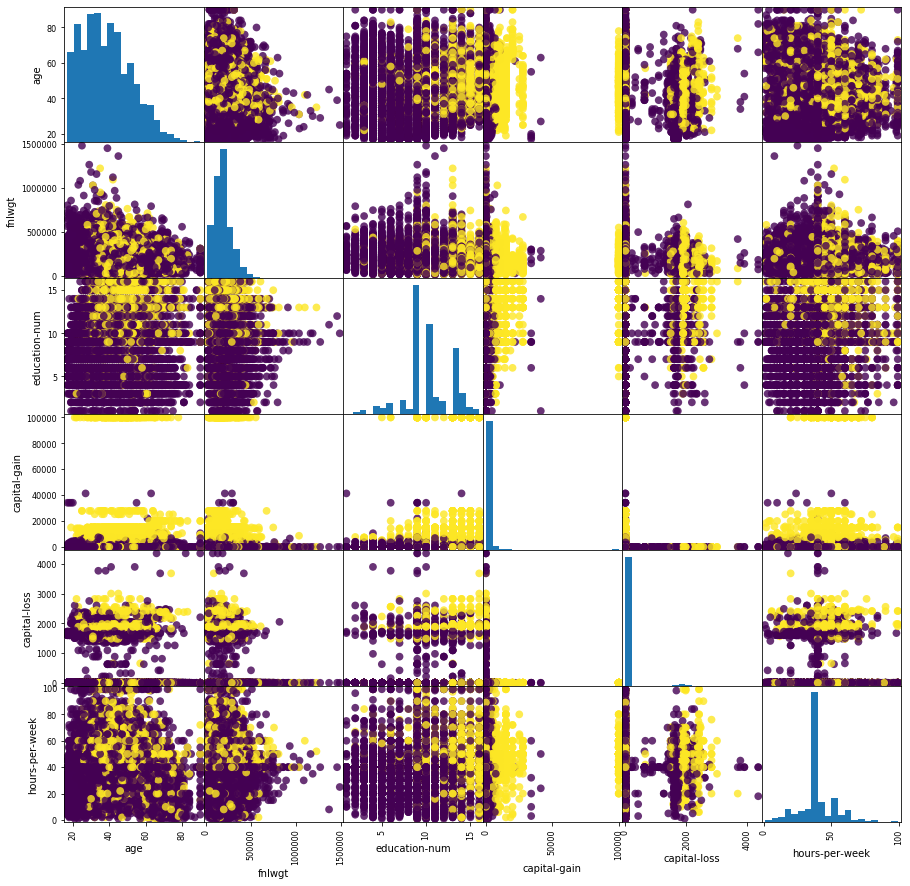

In [15]:

pd.plotting.scatter_matrix(df[cont_ftrs],c = df_preprocessed[label], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.savefig('figures/scatter_matrix_conts.png',dpi=300)
plt.show()

<center><img src="figures/scatter_matrix_conts.png" width="1000"></center>

## Exercise 2

On average, how many more hours do people who earn more than 50k work compared to those who earn less than 50k? Give your answer with two digits after the decimal point!

Plot the hours-per-week distributions of people who earn more than 50k and less than 50k!

### <font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Study the label and categorical features</font>
- <font color='LIGHTGRAY'>Plot class-specific distributions of numerical features</font>
- **Plot class-specific frequencies of categorical features**



In [17]:
import numpy as np

count_matrix = df.groupby(['race', label]).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

gross-income          <=50K   >50K
race                              
 Amer-Indian-Eskimo     275     36
 Asian-Pac-Islander     763    276
 Black                 2737    387
 Other                  246     25
 White                20699   7117
gross-income            <=50K      >50K
race                                   
 Amer-Indian-Eskimo  0.884244  0.115756
 Asian-Pac-Islander  0.734360  0.265640
 Black               0.876120  0.123880
 Other               0.907749  0.092251
 White               0.744140  0.255860


/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


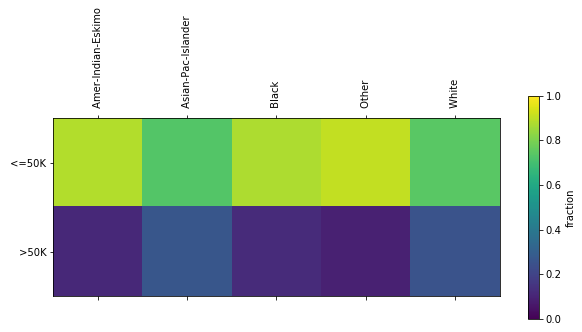

In [18]:
## plt.matshow()
plt.matshow(count_matrix_norm.T,vmin=0,vmax=1)
plt.xticks(np.arange(count_matrix_norm.shape[0]),count_matrix_norm.index,rotation=90)
plt.yticks(np.arange(count_matrix_norm.shape[1]),count_matrix_norm.columns)
plt.colorbar(label='fraction')
plt.tight_layout()
plt.savefig('figures/matshow.png',dpi=300)
plt.show()

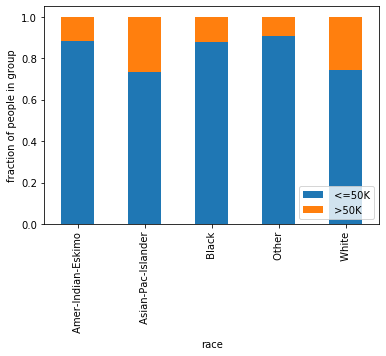

In [19]:
# stacked bar plot
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.savefig('figures/stacked_bar.png',dpi=300)
plt.show()

### By now, you can
- Study the label and categorical features
- Plot class-specific distributions of numerical features
- Plot class-specific frequencies of categorical features